# بسم الله الرحمن الرحيم

## importing libraries

In [1]:
# Importing libraries and adjusting plotting settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pywaffle import Waffle
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)    
plt.rc('figure', titlesize=20)
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

# About the Dataset
## Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

## -The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals).
- BMI: Body mass index is a measure of body fat based on height and weight
- Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke: (Ever told) (you had) a stroke?
- PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: Are you male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: (Ever told) (you had) diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: General health condition
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: (Ever told) (you had) asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: (Ever told) (you had) skin cancer?
- HeartDisease (Our Target): Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

## Reading the dataset

In [2]:
df = pd.read_csv('../Dateset/heart diseases.csv')

## Exploring the dataset

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Checking nulls

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Checking numeric data description

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
print(f"Number of unique values in BMI :{len(df.BMI.value_counts())}")
print(f"Number of unique values in Physcial Health :{len(df.PhysicalHealth.value_counts())}")
print(f"Number of unique values in Menatl Health :{len(df.MentalHealth.value_counts())}")
print(f"Number of unique values in Sleep Time :{len(df.SleepTime.value_counts())}")

Number of unique values in BMI :3604
Number of unique values in Physcial Health :31
Number of unique values in Menatl Health :31
Number of unique values in Sleep Time :24


### Only BMI column can be considered as continious and other columns have a discrete fininte number of values hence can be treated as categorical

## Checking categorical data description

In [8]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


# EDA

## Binning BMI for better insights

In [9]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [10]:
df['BMICategory'].value_counts()

Overweight (25.0 <= BMI < 30.0)       114355
Normal weight (18.5 <= BMI < 25.0)     97778
Obese (30.0 <= BMI < 35.0)             61169
Extremly Obese (BMI >= 35.0)           41379
Underweight (BMI < 18.5)                5114
Name: BMICategory, dtype: int64

## 1 - What are personal key factors that can be used to be indicated as risk factors

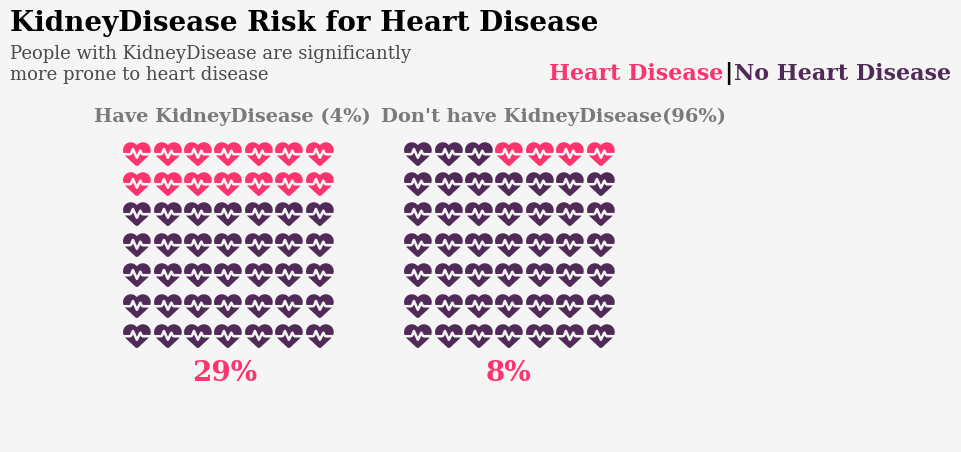

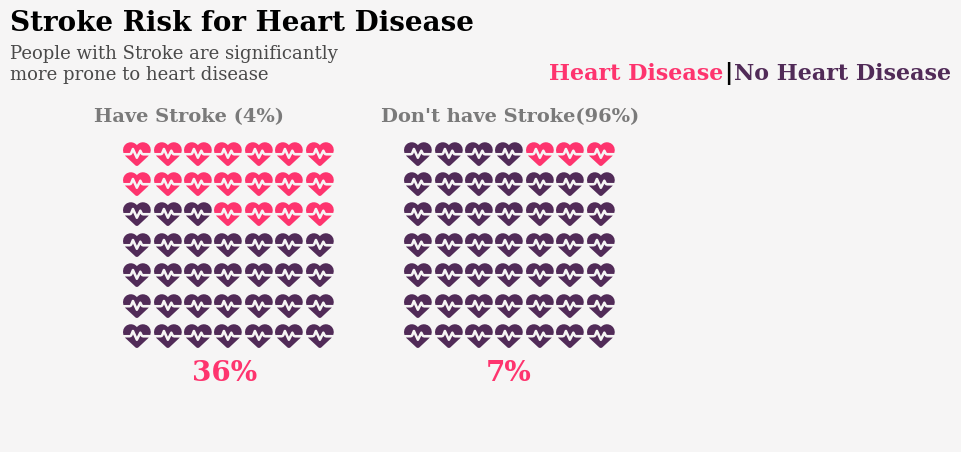

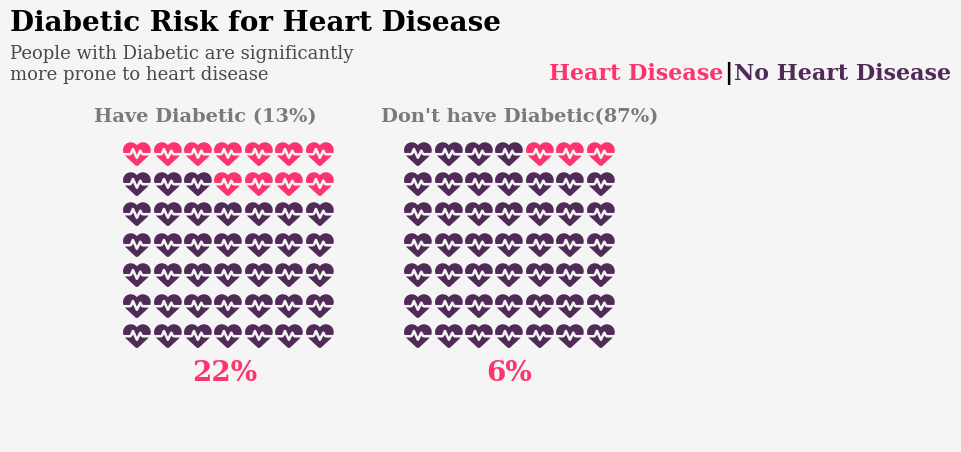

In [22]:
cols = ['KidneyDisease', 'Stroke', 'Diabetic']
for col in cols:
    hd_gen = df[df['HeartDisease'] == 'Yes'][col].value_counts()
    healthy_gen = df[df['HeartDisease'] != "Yes"][col].value_counts()

    no = df[col].value_counts().values[0]
    yes =  df[col].value_counts().values[1]

    hd_no = int(round (hd_gen.values[0] / no * 100, 0))
    hd_yes = int(round( hd_gen.values[1] / yes *100, 0))
    healthy_no = int(round(healthy_gen.values[0] / no * 100, 0))
    healthy_yes = int(round(healthy_gen.values[1] / yes *100, 0))

    no_per = int(round(no/(no+yes) * 100, 0))
    yes_per = int(round(yes/(no+yes)* 100, 0))



    fig = plt.figure(FigureClass = Waffle, 
                     constrained_layout = True,
                     figsize = (7,7),
                     facecolor = '#f6f5f5',dpi = 100,

                     plots = {121:
                              {     
                               'rows':7,
                               'columns': 7,
                               'values' : [healthy_yes,hd_yes],
                                'colors' : ['#512b58','#fe346e'],
                                  'vertical' : True,
                                  'interval_ratio_y': 0.1,
                                  'interval_ratio_x': 0.1,
                                  'icons' : 'heartbeat',
                                  'icon_legend': False,
                                  'icon_size':20,
                                  'plot_anchor':'C',
                                  'alpha':0.1
                              },

                              122 :
                              { 
                                'rows': 7,
                                'columns':7,
                                'values':[healthy_no,hd_no],         
                                  'colors' : ['#512b58','#fe346e'],
                                  'vertical': True,
                                  'interval_ratio_y': 0.1,
                                  'interval_ratio_x': 0.1,
                                  'icons' : 'heartbeat',
                                  'icon_legend' :False,
                                  'icon_size':20,
                                  'plot_anchor':'C',
                                  'alpha':0.1

                               }
                             },

    )
    #fig.text ('asdfasdfasd0', {'font':'Serif', 'size':35, 'color':'black'} )


    fig.text(0., 0.80, f'{col} Risk for Heart Disease', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
    fig.text(0., 0.73, f'People with {col} are significantly \nmore prone to heart disease', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
    fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
    fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
    fig.text(0.26, 0.30, '{}%'.format(100-healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#fe346e'},alpha = 1,)
    fig.text(0.68, 0.30, '{}%'.format(100-healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#fe346e'}, alpha = 1)
    fig.text(0.12, 0.67, 'Have {} ({}%)'.format(col, yes_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
    fig.text(0.53, 0.67, 'Don\'t have {}({}%)'.format(col, no_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)

    fig.text(0.77,0.73, 'Heart Disease', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
    fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
    fig.text(1.035,0.73, 'No Heart Disease', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


    fig.show()

### Acrroding to CDC, The main causes for Kidney Diseases, Stroke and diabetic are the same causes for Heart Disease Ex:-  Hypertension, and this is well shown from the results

-----------
## 2 - what are usual activites that people do and can increase the chacne of getting Heart Diseases

In [27]:
cols = ['Smoking', 'PhysicalActivity', 'AlcoholDrinking']
for col in cols:
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
    fig.add_trace(go.Pie(values=df[df[col]=='No'].HeartDisease.value_counts().values, labels=['Don\'t have HD', 'Have HD'],pull=[0.1,0]
                 ), row=1, col=1)
    fig.add_trace(go.Pie(values=df[df[col]=='Yes'].HeartDisease.value_counts().values, labels=['Don\'t have HD', 'Have HD'],pull=[0.1,0]
                 ), row=1, col=2)
    fig.update_traces(textposition='outside',
                      textinfo='percent+label',
                      hole=.3,
    #                   marker = {'colors':px.colors.qualitative.Set1}
                     )
    fig.update_layout(legend_title="Labels",
                      annotations=[dict(text=f'No {col}', x=0.07, y=1.27, font_size=30, showarrow=False),
                                  dict(text=f'Do {col}', x=0.95, y=1.27, font_size=30, showarrow=False)],
                      font=dict(size=20)
                     )
    fig.show()

### Smokers and people who don't do physical activties are twice as likely to get Heart Disease, Alcohol Drinking turned out to be not a factor

----------
## 3 - who is are more valnurable to Heart Diseases between genders across all ages

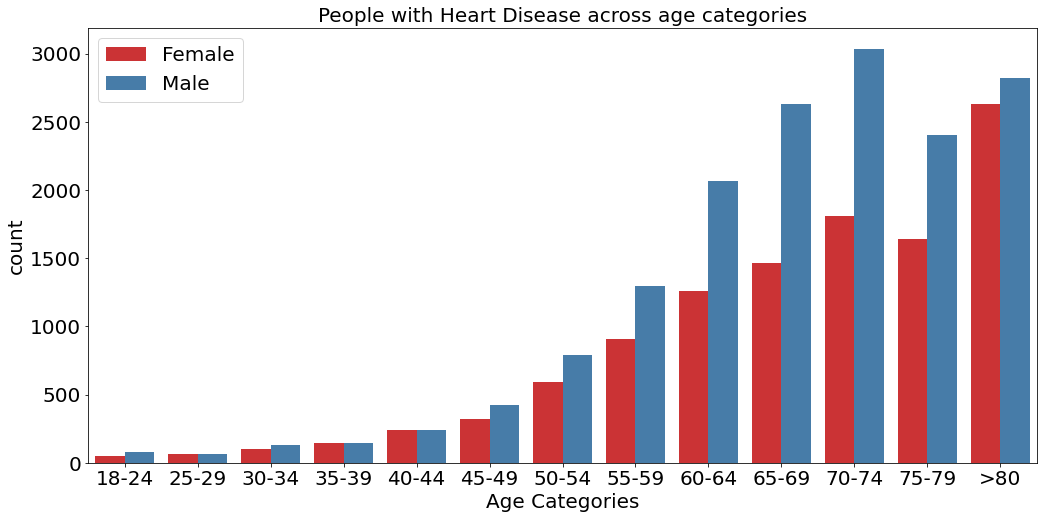

In [13]:
df.loc[df.AgeCategory=='80 or older','AgeCategory'] = '>80'
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.title('People with Heart Disease across age categories')
plt.xlabel('Age Categories')
plt.legend(['Female','Male'])
plt.show()

### As people get older, their risk of heart disease is increased signficantly
### Males are clearly more prone to heart disease

## 5- What are the most habits/factors that can be modified and have high impact in getting Heart Disease?

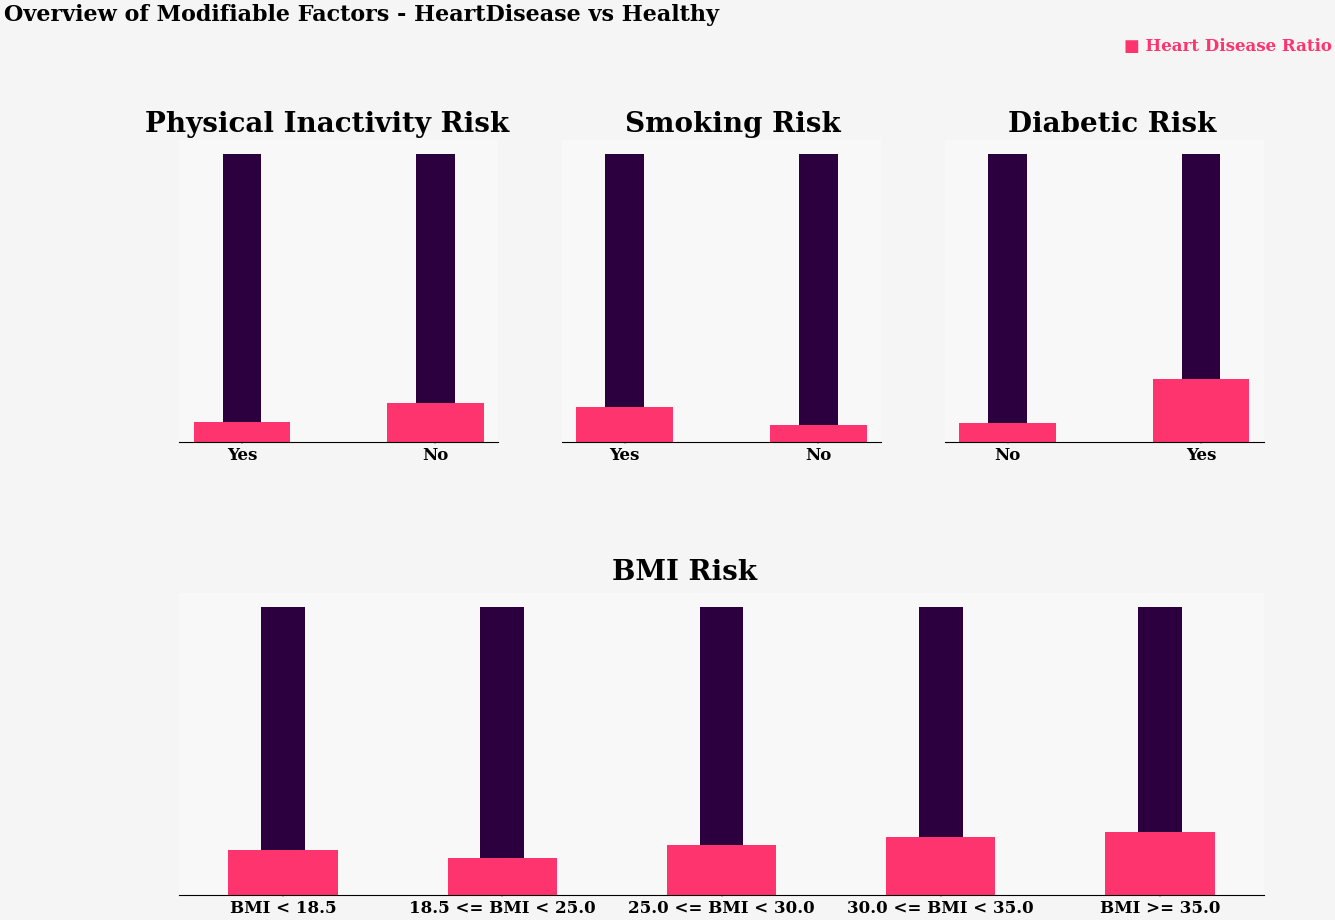

In [157]:
fig = plt.figure(figsize = (35,25),dpi = 40)

gs = fig.add_gridspec(2,3)
gs.update(wspace = 0.2, hspace = 0.5)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,:])

axes = [ax1, ax2, ax3, ax4]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':50}
font_dict = {'size':30, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':20, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':20,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':20,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# ax1: PhysicalActivity - HeartDisease distributions
healthy_gen = df[df['PhysicalActivity'] == "No"].HeartDisease.value_counts(normalize=True)
hd_gen = df[df['PhysicalActivity'] == 'Yes'].HeartDisease.value_counts(normalize=True)

ax1.bar(['Yes','No'] , height = [1,1], width = 0.2,color = healthy_col)
ax1.bar( hd_gen.index, height = [healthy_gen['Yes'], hd_gen['Yes']], width = 0.5,color= stroke_col)
ax1.set_xticklabels(['Yes','No'], **font_dict)

ax1.text(-0.5,1.08, 'Physical Inactivity Risk',**title_args)


# ax2: Smoking - HeartDisease distributions
healthy_gen = df[df['Smoking'] == "No"].HeartDisease.value_counts(normalize=True)
hd_gen = df[df['Smoking'] == "Yes"].HeartDisease.value_counts(normalize=True)

ax2.bar(['Yes','No'] , height = [1,1], width = 0.2,color = healthy_col)
ax2.bar( hd_gen.index, height = [healthy_gen['Yes'], hd_gen['Yes']], width = 0.5,color= stroke_col)
ax2.set_xticklabels(['Yes', 'No'],**font_dict)

ax2.text(0,1.08, 'Smoking Risk',**title_args)


# ax3: Diabetic - HeartDisease distributions
healthy_gen = df[df['Diabetic'] == "No"].HeartDisease.value_counts(normalize=True)
hd_gen = df[df['Diabetic'] == 'Yes'].HeartDisease.value_counts(normalize=True)

ax3.bar( ['Yes','No'] , height = [1,1], width = 0.2,color = healthy_col)
ax3.bar( np.arange(2) , height = [healthy_gen['Yes'], hd_gen['Yes']], width = 0.5,color= stroke_col )
ax3.set_xticklabels(healthy_gen.index, **font_dict)

ax3.text(0,1.08, 'Diabetic Risk',**title_args)

# ax4: BMI - HeartDisease distributions

df_plot = df.groupby('BMICategory')['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot = df_plot.rename('percent').reset_index()
val = df_plot[df_plot['HeartDisease']=='Yes'].drop(['HeartDisease', 'BMICategory'],axis=1)
labels = ['BMI < 18.5', '18.5 <= BMI < 25.0', '25.0 <= BMI < 30.0', '30.0 <= BMI < 35.0' ,'BMI >= 35.0']
ax4.bar( pd.unique(df_plot.BMICategory), height = [1] * len(pd.unique(df_plot.BMICategory)), width = 0.2,color = healthy_col)
ax4.bar( np.arange(5) , height = val.percent.values/50, width = 0.5,color= stroke_col)
ax4.set_xticklabels(labels, **font_dict)

ax4.text(1.5,1.1, 'BMI Risk',**title_args)

fig.text(0.8,0.97, '■ Heart Disease Ratio',{'font':'Serif', 'color': '#fe346e', 'size':30,'weight':'bold'})
fig.text(0,1, 'Overview of Modifiable Factors - HeartDisease vs Healthy', {'font':'Serif', 'color':'black','size':40, 'weight':'bold'})

fig.show()

### Diabetic, Physical Activity, BMI and Smoking are all considered as modifiable factors, NOT managing them can increase the risk of getting Heart Disease up to 2-3 times

## 6 - if i don't have those bad habits, am i safe?

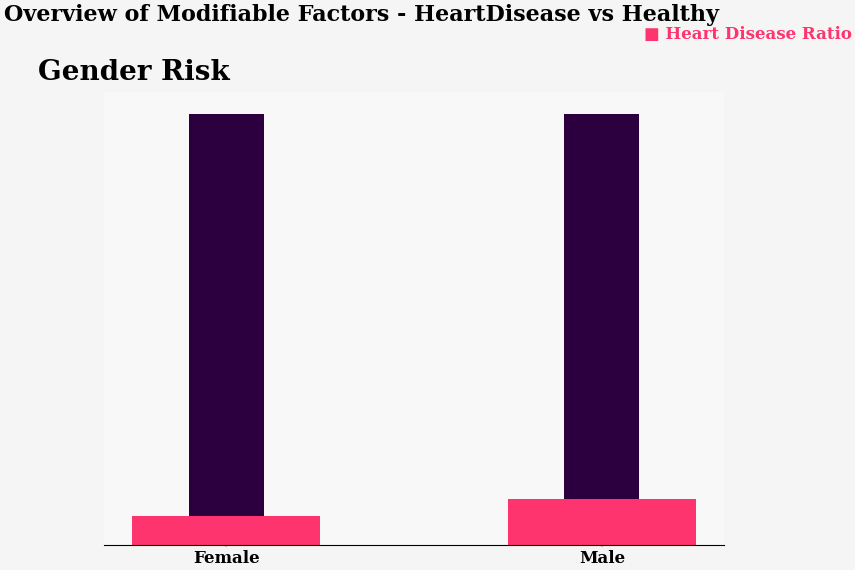

In [227]:
fig = plt.figure(figsize = (20,15),dpi = 40)

gs = fig.add_gridspec(1,1)
gs.update(wspace = 0.2, hspace = 0.5)


ax1 = fig.add_subplot(gs[0,0])


axes = [ax1]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':50}
font_dict = {'size':30, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':20, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':20,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':20,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# ax1: Gender - HeartDisease distributions
healthy_gen = df[df['Sex'] == "Female"].HeartDisease.value_counts(normalize=True)
hd_gen = df[df['Sex'] == 'Male'].HeartDisease.value_counts(normalize=True)

ax1.bar(['Female','Male'] , height = [1,1], width = 0.2,color = healthy_col)
ax1.bar( ['Female','Male'], height = [healthy_gen['Yes'], hd_gen['Yes']], width = 0.5,color= stroke_col)
ax1.set_xticklabels(['Female','Male'], **font_dict)

ax1.text(-0.5,1.08, 'Gender Risk',**title_args)


fig.text(0.8,0.97, '■ Heart Disease Ratio',{'font':'Serif', 'color': '#fe346e', 'size':30,'weight':'bold'})
fig.text(0,1, 'Overview of Modifiable Factors - HeartDisease vs Healthy', {'font':'Serif', 'color':'black','size':40, 'weight':'bold'})

fig.show()

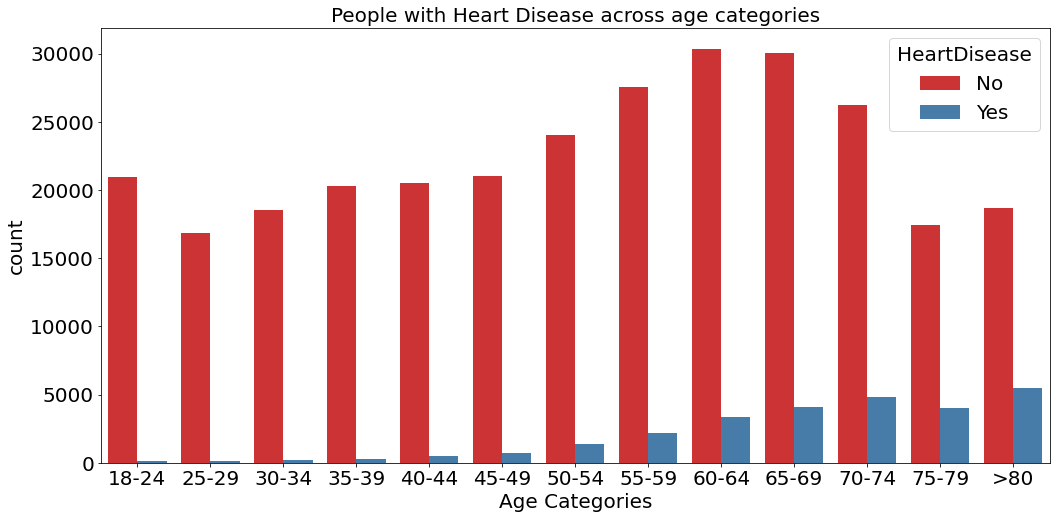

In [225]:
df.loc[df.AgeCategory=='80 or older','AgeCategory'] = '>80'
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', palette='Set1', order=order)
plt.title('People with Heart Disease across age categories')
plt.xlabel('Age Categories')
plt.show()

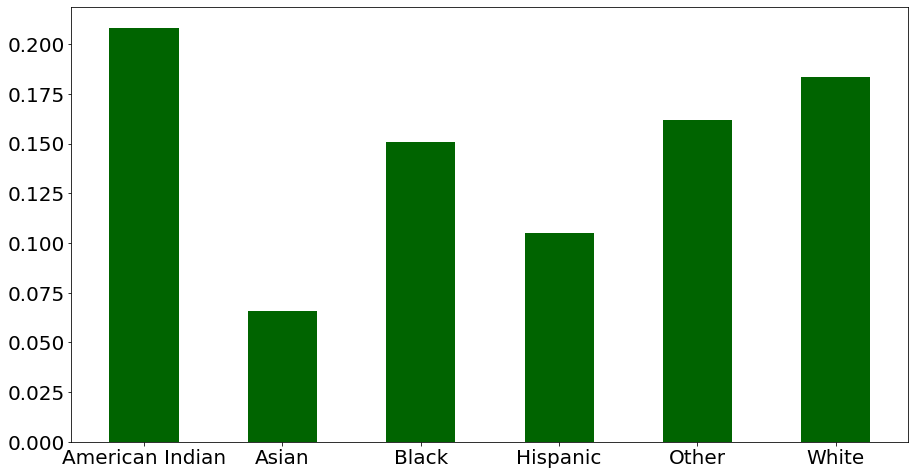

In [270]:
df_plot = df.groupby('Race')['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot = df_plot.rename('percent').reset_index()
val = df_plot[df_plot['HeartDisease']=='Yes'].drop(['HeartDisease', 'Race'],axis=1)
labels = ['hi','American Indian', 'Asian', 'Black', 'Hispanic' ,'Other', 'White']
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
plt.bar( np.arange(6) , height = val.percent.values/50, width = 0.5,color='darkgreen')
ax.set_xticklabels(labels)
plt.show()

### Even if you don't have those bad habits/factors, it's shown that there is some non-modifiable factors which can increase the risk of getting Heart Disease like: Gender, Age, Race

----------
## 6- What is the risk of getting Heart Disease if you are exposed to more than 1 factor?

Text(0.5, 1.0, 'Kidney and stroke')

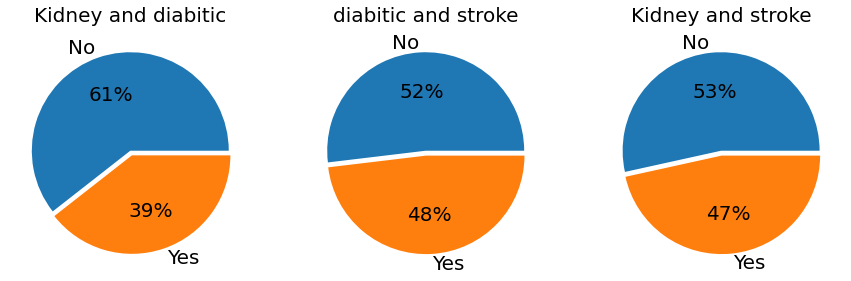

In [272]:
fig, axes = plt.subplots(1, 3, figsize =(15, 15))
axes[0].pie(df[(df['KidneyDisease']=='Yes') & (df['Diabetic']=='Yes')]['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
axes[0].set_title("Kidney and diabitic")
axes[1].pie(df[ (df['Diabetic']=='Yes') & (df['Stroke'] == 'Yes')]['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
axes[1].set_title("diabitic and stroke")
axes[2].pie(df[(df['KidneyDisease']=='Yes') & (df['Stroke'] == 'Yes')]['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
axes[2].set_title("Kidney and stroke")



Text(0.5, 1.0, 'Kidney')

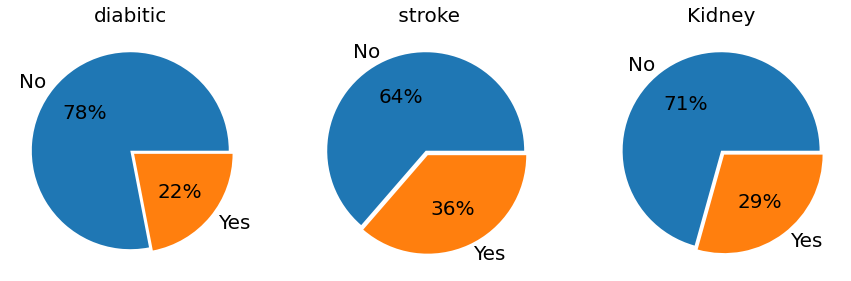

In [273]:
fig, axes = plt.subplots(1, 3, figsize =(15, 15))
axes[0].pie(df[(df['Diabetic']=='Yes')]['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
axes[0].set_title("diabitic")
axes[1].pie(df[ (df['Stroke'] == 'Yes')]['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
axes[1].set_title(" stroke")
axes[2].pie(df[(df['KidneyDisease']=='Yes')]['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
axes[2].set_title("Kidney")



### Having more than 1 factor can increase the chance of getting Heart Disease signifcantly

# الحمدلله